In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 324.0 bytes


In [12]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [16]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [18]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [24]:
#coefficients - m1,m2,m3
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [26]:
#intercept - b
reg.intercept_

221323.0018654043

In [32]:
reg.predict([[3000,2,15]])

C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([555812.31921819])

In [34]:
112.06244194*3000 + 23388.88007794*2 + -3231.71790863*15 + 221323.0018654043

555812.3192118343

In [36]:
reg.predict([[2500,4,5]])

C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [89]:
data = pd.read_csv("hiring.csv")
data.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [91]:
data.rename(columns={'test_score(out of 10)': 'test_score', 'interview_score(out of 10)' : 'interview_score','salary($)':'salary'}, inplace = True)

In [93]:
data['experience'] = data['experience'].fillna('zero')
data.head()

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [95]:
!pip install word2number

In [96]:
from word2number import w2n
data['experience'] = data['experience'].apply(w2n.word_to_num)
data.head()


,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


In [97]:

data['test_score'] = data['test_score'].fillna(data['test_score'].median())

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       8 non-null      int64  
 1   test_score       8 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 388.0 bytes


In [103]:
reg = linear_model.LinearRegression()
reg.fit(data[['experience','test_score','interview_score']],data.salary)

LinearRegression()

In [105]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [107]:
reg.intercept_

17737.26346433768

In [109]:
reg.predict([[2,9,6]])

C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [111]:
reg.predict([[12,10,10]])

C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


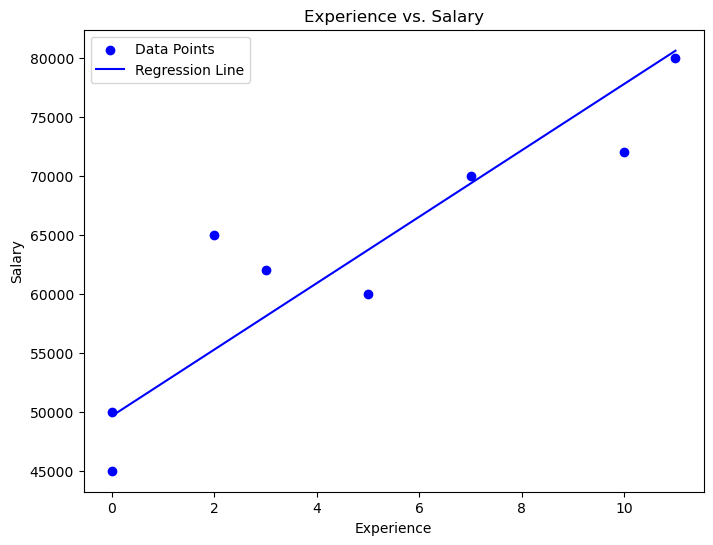

C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


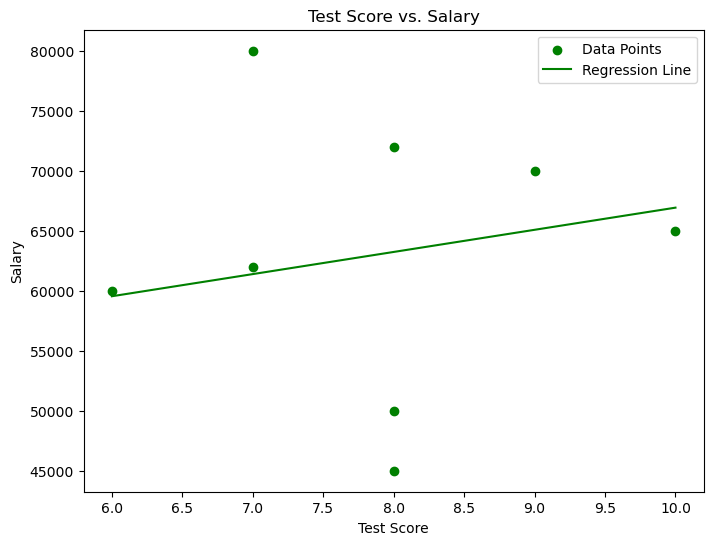

C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


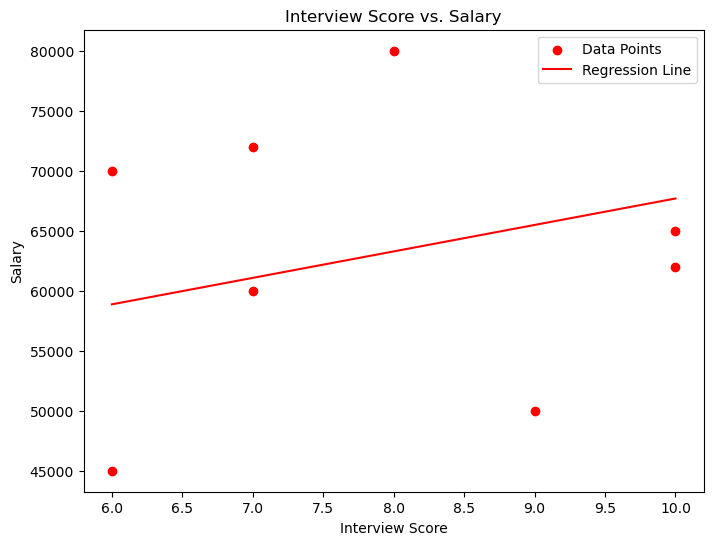

In [124]:
import numpy as np
# Plotting experience vs. salary with regression line
plt.figure(figsize=(8, 6))
plt.scatter(data['experience'], data['salary'], color='blue', label='Data Points')
# Create a line using the model's predictions
experience_range = np.linspace(data['experience'].min(), data['experience'].max(), 100)
predicted_salary_experience = reg.predict(
    np.column_stack((experience_range, np.full(100, data['test_score'].mean()), np.full(100, data['interview_score'].mean())))
)
plt.plot(experience_range, predicted_salary_experience, color='blue', label='Regression Line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience vs. Salary')
plt.legend()
plt.show()

# Plotting test_score vs. salary with regression line
plt.figure(figsize=(8, 6))
plt.scatter(data['test_score'], data['salary'], color='green', label='Data Points')
test_score_range = np.linspace(data['test_score'].min(), data['test_score'].max(), 100)
predicted_salary_test_score = reg.predict(
    np.column_stack((np.full(100, data['experience'].mean()), test_score_range, np.full(100, data['interview_score'].mean())))
)
plt.plot(test_score_range, predicted_salary_test_score, color='green', label='Regression Line')
plt.xlabel('Test Score')
plt.ylabel('Salary')
plt.title('Test Score vs. Salary')
plt.legend()
plt.show()

# Plotting interview_score vs. salary with regression line
plt.figure(figsize=(8, 6))
plt.scatter(data['interview_score'], data['salary'], color='red', label='Data Points')
interview_score_range = np.linspace(data['interview_score'].min(), data['interview_score'].max(), 100)
predicted_salary_interview_score = reg.predict(
    np.column_stack((np.full(100, data['experience'].mean()), np.full(100, data['test_score'].mean()), interview_score_range))
)
plt.plot(interview_score_range, predicted_salary_interview_score, color='red', label='Regression Line')
plt.xlabel('Interview Score')
plt.ylabel('Salary')
plt.title('Interview Score vs. Salary')
plt.legend()
plt.show()